In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(49610, 31)

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49610 entries, 0 to 49609
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    49610 non-null  int64  
 1   V1      49610 non-null  float64
 2   V2      49610 non-null  float64
 3   V3      49610 non-null  float64
 4   V4      49609 non-null  float64
 5   V5      49609 non-null  float64
 6   V6      49609 non-null  float64
 7   V7      49609 non-null  float64
 8   V8      49609 non-null  float64
 9   V9      49609 non-null  float64
 10  V10     49609 non-null  float64
 11  V11     49609 non-null  float64
 12  V12     49609 non-null  float64
 13  V13     49609 non-null  float64
 14  V14     49609 non-null  float64
 15  V15     49609 non-null  float64
 16  V16     49609 non-null  float64
 17  V17     49609 non-null  float64
 18  V18     49609 non-null  float64
 19  V19     49609 non-null  float64
 20  V20     49609 non-null  float64
 21  V21     49609 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,49610.000000,49610.000000,49610.000000,49610.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,...,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000,49609.000000
mean,28803.556239,-0.242569,0.012235,0.693009,0.185186,-0.257016,0.104114,-0.120255,0.053442,0.123490,...,-0.028396,-0.107154,-0.040123,0.007997,0.135954,0.020813,0.004792,0.004533,93.120688,0.002983
std,13097.468525,1.885867,1.630704,1.510559,1.400175,1.413057,1.310705,1.283507,1.224245,1.213441,...,0.736050,0.637733,0.590810,0.594121,0.439067,0.501438,0.388364,0.333225,253.265971,0.054539
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,21734.250000,-0.992845,-0.562967,0.217605,-0.720957,-0.866471,-0.635669,-0.605928,-0.146749,-0.611499,...,-0.231664,-0.529531,-0.179110,-0.322243,-0.127983,-0.330532,-0.063339,-0.006675,7.610000,0.000000
50%,33390.000000,-0.247223,0.079282,0.797007,0.190288,-0.287810,-0.150940,-0.076595,0.058406,0.012150,...,-0.068396,-0.082137,-0.051560,0.061999,0.175766,-0.071826,0.008986,0.022155,25.000000,0.000000
75%,38852.750000,1.155638,0.732318,1.431013,1.067346,0.283513,0.493918,0.424969,0.331555,0.819242,...,0.108082,0.307262,0.078474,0.401392,0.421960,0.300180,0.083910,0.076342,85.000000,0.000000
max,44135.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [ ]:
df.shape

(49610, 31)

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

(0.0, 800.0)

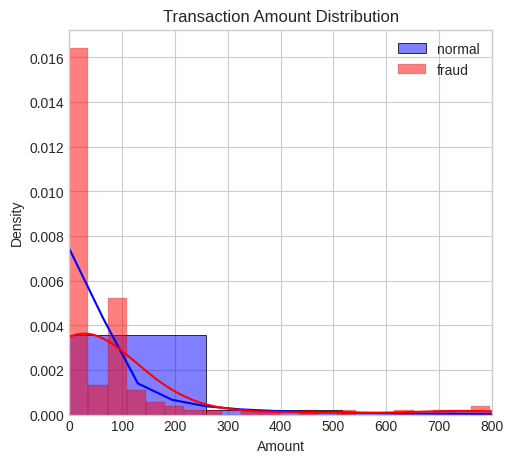

In [ ]:
#Visualizations
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(normal['Amount'], bins=50, color='blue', stat='density', label='normal', kde=True)
sns.histplot(fraud['Amount'], bins=50, color='red', stat='density', label='fraud', kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.xlim(0,800)

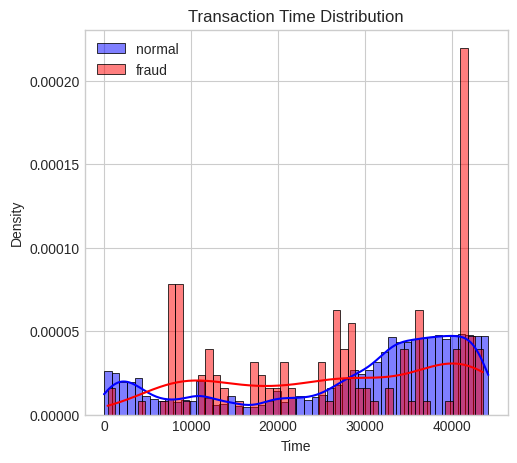

In [ ]:
#Time
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(normal['Time'], bins=50, color='blue', stat='density', label='normal', kde=True)
sns.histplot(fraud['Time'], bins=50, color='red', stat='density', label='fraud', kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

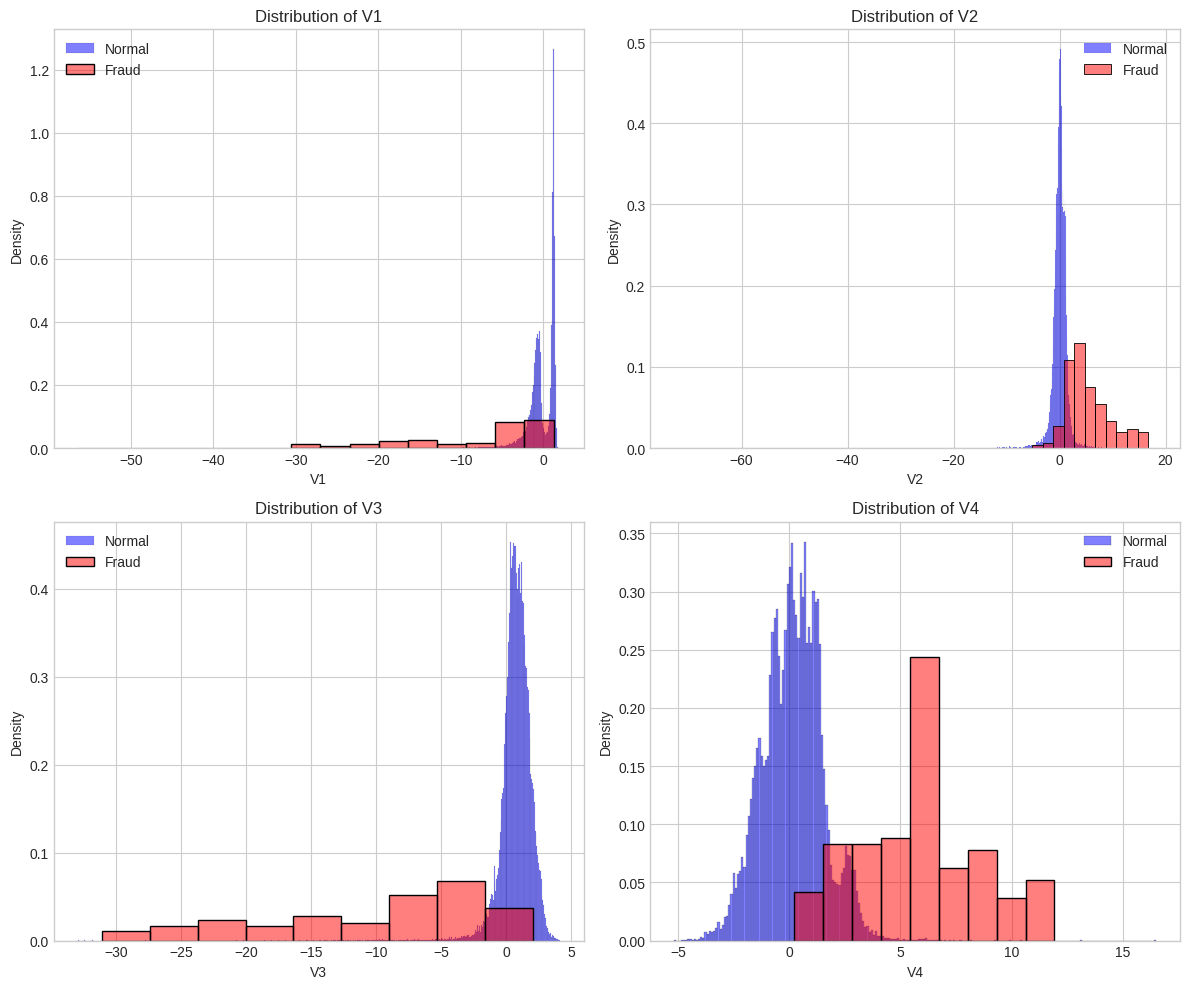

In [ ]:
#PCA Feature Exploration
plt.figure(figsize=(12,10))

for i in range(1,5):
  plt.subplot(2,2,i)
  feature = f'V{i}'
  sns.histplot(normal[feature], color='blue', stat='density', label='Normal', alpha=0.5)
  sns.histplot(fraud[feature], color='red', stat='density', label='Fraud', alpha=0.5)
  plt.title(f'Distribution of {feature}')
  plt.legend()
plt.tight_layout()


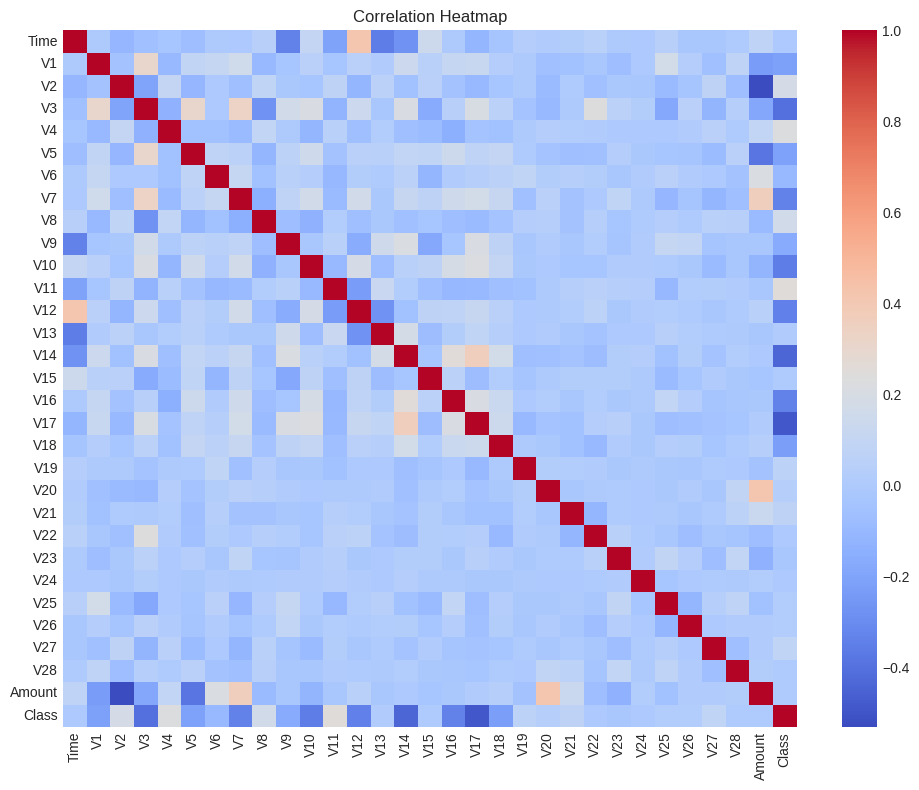

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()

In [ ]:
# Data Processing
# Scale amount and time
scalar = StandardScaler()
df['Amount'] = scalar.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scalar.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.199177,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.223085,0.0
1,-2.199177,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.357062,0.0
2,-2.199100,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.127440,0.0
3,-2.199100,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.119951,0.0
4,-2.199024,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.091331,0.0


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
#Split into training and testing (80 /20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)
print('Frauds in training set:', y_train.sum())
print('Fraud in testing set:', y_test.sum())
#

Training set shape: (39687, 30)
Testing set shape: (9922, 30)
Frauds in training set: 118.0
Fraud in testing set: 30.0


In [ ]:
# Handling Class Imbalance
# Method 1: Using Class weights (will be applied in the model directly)
print('Original Class Distribution', Counter(y_train))

Original Class Distribution Counter({0.0: 39569, 1.0: 118})


In [ ]:
# Method 2: Random Undersampling
# Set fraud to normal ration 1:3
undersampler = RandomUnderSampler(sampling_strategy=0.33, random_state=42)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
print('Class Distribution after undersampling:', Counter(y_under))

Class Distribution after undersampling: Counter({0.0: 357, 1.0: 118})


In [ ]:
# Method 3: SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(sampling_strategy=0.33, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print("Class Distribution after undersampling:", Counter(y_smote))

Class Distribution after undersampling: Counter({0.0: 39569, 1.0: 13057})


Text(0.5, 1.0, 'Original Distribution')

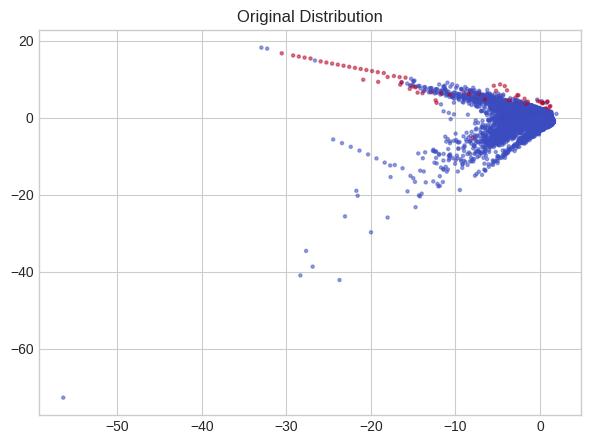

In [ ]:
# Visualize the effect of the methods
plt.figure(figsize=(7,5))
plt.scatter(X_train['V1'], X_train['V2'], c=y_train, alpha=0.5, s=5, cmap='coolwarm')
plt.title('Original Distribution')

Text(0.5, 1.0, 'Undersampling Distribution')

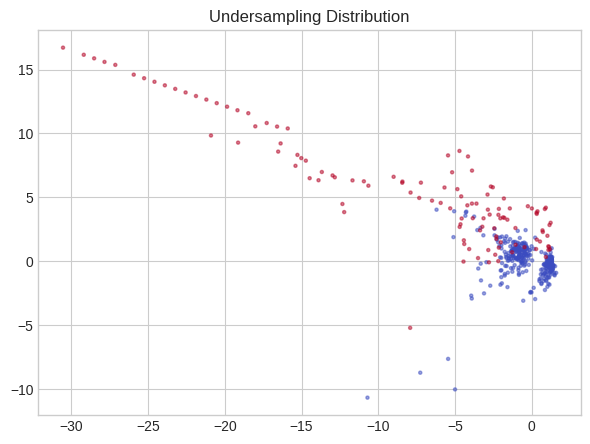

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_under['V1'], X_under['V2'], c=y_under, alpha=0.5, s=5, cmap='coolwarm')
plt.title('Undersampling Distribution')

Text(0.5, 1.0, 'Oversampling Distribution')

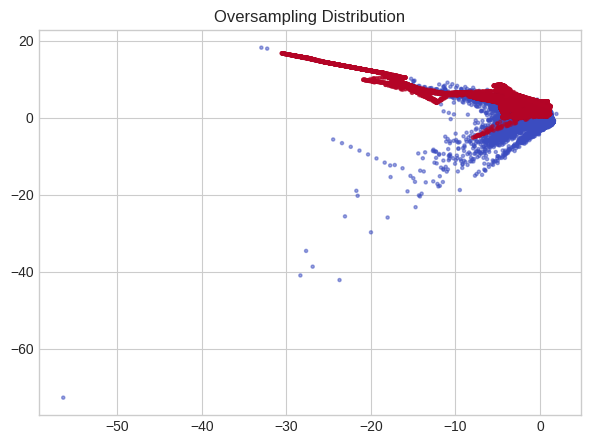

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X_smote['V1'], X_smote['V2'], c=y_smote, alpha=0.5, s=5, cmap='coolwarm')
plt.title('Oversampling Distribution')

In [ ]:
# Train the model
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_smote, y_smote)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

In [ ]:
# Evaluate the performance
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[9804   88]
 [   3   27]]


Text(0.5, 1.0, 'Confusion Matrix')

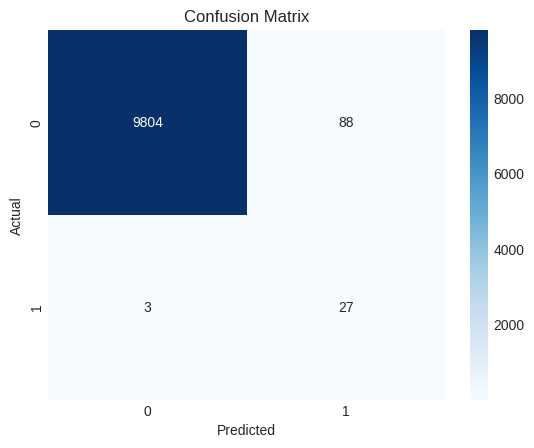

In [ ]:
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [ ]:
# Raandom Forest
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_smote, y_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_rf)
print(cm_lr)

[[9890    2]
 [   3   27]]


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

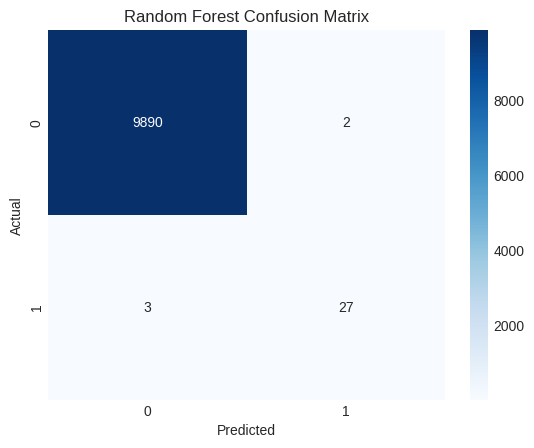

In [ ]:
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')